In [98]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC

import time

In [2]:
# pandas settings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Importing Dataset

In [3]:
# reading data train

data_train = pd.read_csv("train.csv")

In [4]:
data_train.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,y
0,0.695517,-0.232452,0,-0.713083,1,0,0.695517,-0.401396,-0.260866,-0.900753,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-0.636765,-0.232452,0,-0.761484,1,1,-0.636765,-0.401396,-1.015248,-0.900753,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.058867,-0.232452,0,1.934648,1,0,1.058867,-0.401396,-0.854313,-0.900753,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,-0.636765,-0.232452,0,-0.763277,0,0,-0.636765,-0.401396,0.211880,-0.900753,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.394532,1.353897,0,-0.350969,1,0,-0.394532,-0.401396,-0.381567,-0.900753,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [5]:
# reading data test

data_test = pd.read_csv("test.csv")

In [6]:
data_test.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,previous,y,contact_cellular,contact_telephone,marital_divorced,marital_married,marital_single,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,-1.056270,-1.758874,0,0.121072,0,0,-1.056270,1.611873,-0.711861,-0.576829,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,-0.772583,-0.227607,0,1.118644,1,1,-0.772583,-0.490631,-0.169194,-0.576829,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.583458,1.303660,0,-0.024144,1,0,-0.583458,-0.911131,-0.303898,-0.576829,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,-1.056270,1.303660,0,0.017726,1,1,-1.056270,-0.070130,-0.250017,0.387967,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,1.686036,-0.227607,0,-0.472753,1,0,1.686036,-0.490631,-0.146102,-0.576829,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


## Modelling

### Split Data Train & Test

#### Kaggle Default

In [7]:
# splitting by kaggle task default

jumlah_train = data_train.shape[0]
jumlah_test  = data_test.shape[0]

total      = jumlah_train + jumlah_test
perc_train = round(jumlah_train/total*100,2)
perc_test  = round(jumlah_test/total*100,2)

print("Jumlah Train Dataset adalah sejumlah : " +str(jumlah_train)+" ("+str(perc_train)+"%)")
print("Jumlah Test Dataset adalah sejumlah  : " +str(jumlah_test)+"  ("+str(perc_test)+"%)")

Jumlah Train Dataset adalah sejumlah : 45276 (90.92%)
Jumlah Test Dataset adalah sejumlah  : 4521  (9.08%)


In [8]:
# categorising feature & label

feature = ['age','education','default','balance','housing','loan','day','month','duration','campaign','previous',
          'contact_cellular','contact_telephone','marital_divorced','marital_married','marital_single',
          'job_admin.','job_blue-collar','job_entrepreneur','job_housemaid','job_management','job_retired','job_self-employed',
          'job_services','job_student','job_technician','job_unemployed']

label   = ['y']

In [9]:
# train variable

X_train = data_train[feature]
y_train = data_train['y']

In [10]:
# test variabel

X_test = data_test[feature]
y_test = data_test['y']

### Modeling Preparation

#### Evaluation Method

In [11]:
def eval_classification(model):
    y_pred             = model.predict(X_test)
    y_pred_train       = model.predict(X_train)
    y_pred_proba       = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)

    print("Accuracy  (Test Set)    : %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set)    : %.2f" % precision_score(y_test, y_pred))
    print("Recall    (Test Set)    : %.2f" % recall_score(y_test, y_pred))
    
    print("\nF1-Score  (Test Set)    : %.2f" % f1_score(y_test, y_pred))

    print("\nroc_auc   (test-proba)  : %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc   (train-proba) : %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

In [12]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [13]:
def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [70]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### Logistic Regresion

#### Without Hyperparameter Tuning

In [33]:
start_time = time.time()

logreg = LogisticRegression(solver='lbfgs', 
                            max_iter=210,
                            C=1)
logreg.fit(X_train, y_train)
eval_classification(logreg)
print("\nExecution time: " + str((time.time() - start_time)) + ' ms')

Accuracy  (Test Set)    : 0.83
Precision (Test Set)    : 0.31
Recall    (Test Set)    : 0.43

F1-Score  (Test Set)    : 0.36

roc_auc   (test-proba)  : 0.75
roc_auc   (train-proba) : 0.94

Execution time: 0.6679489612579346 ms


#### With Hyperparameter Tuning

In [35]:
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
max_iter = [210, 1000, 10000]
param_grid = dict(max_iter=max_iter, C=C, penalty=penalty)

logreg = LogisticRegression(solver='liblinear')
logistic_grid = GridSearchCV(logreg, param_grid, scoring='roc_auc', cv=5)

start_time = time.time()
logistic_grid.fit(X_train, y_train)

eval_classification(logistic_grid)
print("\nBest: %f using %s" % (logistic_grid.best_score_, logistic_grid.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Accuracy  (Test Set)    : 0.82
Precision (Test Set)    : 0.31
Recall    (Test Set)    : 0.45

F1-Score  (Test Set)    : 0.37

roc_auc   (test-proba)  : 0.77
roc_auc   (train-proba) : 0.93

Best: 0.917469 using {'C': 0.05, 'max_iter': 210, 'penalty': 'l1'}
Execution time: 903.9022359848022 ms


In [63]:
kolom = X_train.columns.to_list()
nilai = logistic_grid.best_estimator_.coef_

In [71]:
output = pd.DataFrame({'kolom':kolom,
                      'nilai':nilai[0]})
output.sort_values('nilai', ascending=False).T

,10,8,1,3,7,6,0,9,11,2,5,4,24,12,16,15,14,20,25,17,23,13,26,19,22,21,18
kolom,previous,duration,education,balance,month,day,age,campaign,contact_cellular,default,loan,housing,job_student,contact_telephone,job_admin.,marital_single,marital_married,job_management,job_technician,job_blue-collar,job_services,marital_divorced,job_unemployed,job_housemaid,job_self-employed,job_retired,job_entrepreneur
nilai,1.06924,0.811478,0.416794,0.244184,0.02602,-0.103697,-0.137435,-0.443581,-1.489138,-1.749266,-1.828173,-1.917943,-2.325689,-2.358475,-2.800547,-3.135635,-3.157129,-3.185663,-3.241881,-3.470809,-3.568136,-3.806221,-4.044463,-4.135208,-4.253791,-4.467339,-5.453538


param value: 0.0001; train: 0.8516964295617129; test: 0.7916242802303264
param value: 0.0006040404040404041; train: 0.8803514802841382; test: 0.8142192898272553
param value: 0.0011080808080808082; train: 0.8880269902314288; test: 0.8145556621880999
param value: 0.0016121212121212123; train: 0.8924073234885288; test: 0.813796065259117
param value: 0.002116161616161616; train: 0.895547736777311; test: 0.8129534548944338
param value: 0.0026202020202020205; train: 0.8980317115171639; test: 0.8121487523992321
param value: 0.0031242424242424243; train: 0.9001127819774813; test: 0.8113382917466411
param value: 0.003628282828282828; train: 0.9019023556405168; test: 0.8105791746641076
param value: 0.004132323232323233; train: 0.9034823929307829; test: 0.8098857965451055
param value: 0.004636363636363637; train: 0.904902406116727; test: 0.8092850287907869
param value: 0.0051404040404040416; train: 0.9061773382483909; test: 0.8086837811900192
param value: 0.005644444444444445; train: 0.9073366754

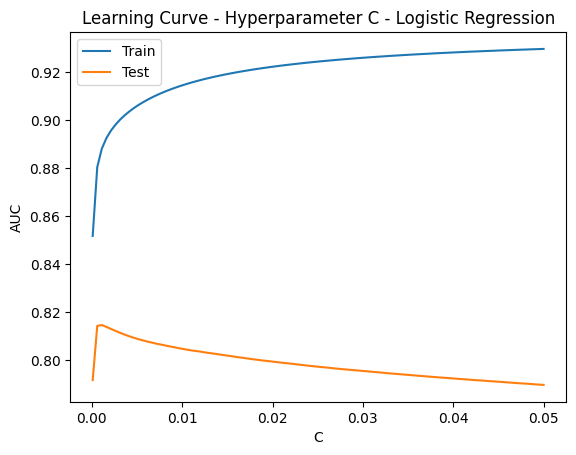

In [72]:
param_values = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
draw_learning_curve(param_values)

### K-NN

#### Without Hyperparameter Tuning

In [100]:
start_time = time.time()

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

eval_classification(knn)
print("\nExecution time: " + str((time.time() - start_time)) + ' ms')

Accuracy  (Test Set)    : 0.81
Precision (Test Set)    : 0.29
Recall    (Test Set)    : 0.47

F1-Score  (Test Set)    : 0.36

roc_auc   (test-proba)  : 0.72
roc_auc   (train-proba) : 1.00

Execution time: 3.10223388671875 ms


#### With Hyperparameter Tuning

In [91]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7], 'metric': ['euclidean', 'manhattan']}
knn_grid = GridSearchCV(knn, knn_params, cv=5)

start_time = time.time()
knn_grid.fit(X_train, y_train)
knn_best_model = knn_grid.best_estimator_
knn_accuracy = knn_best_model.score(X_test, y_test)

knn_probs = knn_best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)

eval_classification(knn_grid)
print("\nExecution time: " + str((time.time() - start_time)) + ' ms')

Accuracy  (Test Set)    : 0.83
Precision (Test Set)    : 0.32
Recall    (Test Set)    : 0.44

F1-Score  (Test Set)    : 0.37

roc_auc   (test-proba)  : 0.69
roc_auc   (train-proba) : 1.00

Execution time: 39.73297119140625 ms


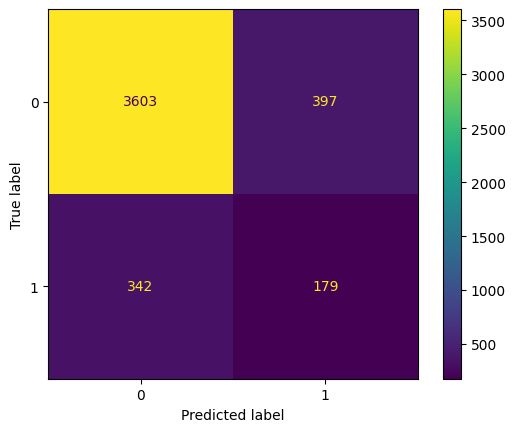

In [99]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

param value: 1; train: 1.0; test: 0.6199784069097889
param value: 2; train: 0.9998066535575257; test: 0.6619078694817658
param value: 3; train: 0.9994737618968864; test: 0.6906701055662188
param value: 4; train: 0.9990254567365295; test: 0.7067907869481764
param value: 5; train: 0.9984656475046031; test: 0.7214280230326295
param value: 6; train: 0.997828611700267; test: 0.7303164587332054
param value: 7; train: 0.9971446510503559; test: 0.7422547984644913
param value: 8; train: 0.9964032002448084; test: 0.7489978406909789
param value: 9; train: 0.9957204835482014; test: 0.7509601727447217
param value: 10; train: 0.9949848241989774; test: 0.7518303742802303
param value: 11; train: 0.994223643806204; test: 0.7576446737044147
param value: 12; train: 0.9934667006598614; test: 0.7581341170825336
param value: 13; train: 0.9927520499745547; test: 0.7608306142034549
param value: 14; train: 0.9920162335457369; test: 0.7640765355086372
param value: 15; train: 0.9912110211086018; test: 0.76726487

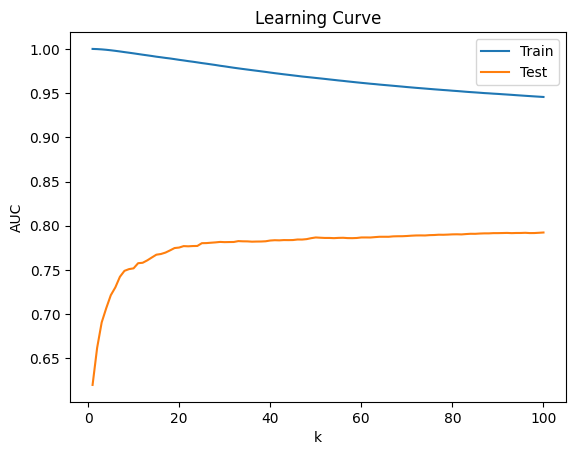

In [103]:
def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

param value: 300; train: 0.9135922843705586; test: 0.800690019193858
param value: 301; train: 0.913517084222472; test: 0.8006343570057581
param value: 302; train: 0.9134362038421224; test: 0.8006964971209213
param value: 303; train: 0.9133603978156032; test: 0.8007492802303263
param value: 304; train: 0.9132714497882961; test: 0.8007437619961613
param value: 305; train: 0.9131755736728231; test: 0.8008013435700576
param value: 306; train: 0.9130948747633083; test: 0.80076943378119
param value: 307; train: 0.9130164217992883; test: 0.8008318138195778
param value: 308; train: 0.9129252395342823; test: 0.8009095489443377
param value: 309; train: 0.9128569684500114; test: 0.8010201535508638
param value: 310; train: 0.9127828444434891; test: 0.8010117562380039
param value: 311; train: 0.912702104556689; test: 0.8011166026871401
param value: 312; train: 0.9126258790008202; test: 0.8011031669865643
param value: 313; train: 0.9125485099835614; test: 0.801015595009597
param value: 314; train: 0

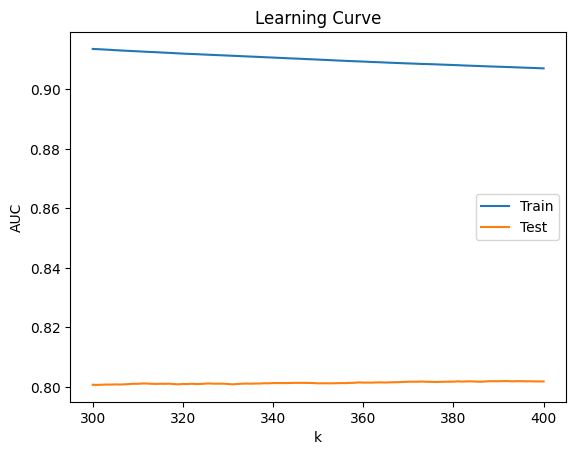

In [105]:
param_values = [int(x) for x in np.linspace(300, 400, 100)]
draw_learning_curve(param_values)

In [ ]:
param_values = [int(x) for x in np.linspace(1500, 1600, 100)]
draw_learning_curve(param_values)

### Decision Tree

### Random Forest

## Feature Importance

### Most Important Feature

### Business Insight